In [53]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [54]:
movie_data = 'movie_data.xlsx'
oscar_data = 'oscar_nominees.csv'
movie_df = pd.read_excel(movie_data)
movie_df.head()

,Count,ID,TITLE,BUDGET,REVENUE,RUNTIME,GENRE 1,GENRE 2,IMDB_ID,ORIGINAL TITLE,POPULARITY,RELEASE DATE,OSCAR WINNER,Year
0,0,339403,Baby Driver,34000000,226945087,113.0,Action,Crime,tt3890160,Baby Driver,22.094,2017-06-28,WINNER,2017
1,1,425298,Darkland,0,0,112.0,Thriller,Action,tt5431082,Darkland,4.753,2017-01-19,NO,2017
2,2,419430,Get Out,4500000,255017329,104.0,Mystery,Thriller,tt5052448,Get Out,24.949,2017-02-24,WINNER,2017
3,3,428449,A Ghost Story,100000,1596371,93.0,Drama,Fantasy,tt6265828,"Ghost Story, A",7.997,2017-07-07,NO,2017
4,4,441498,In the Intense Now,0,0,127.0,Documentary,NaN,tt6532954,No Intenso Agora,1.830,2017-11-09,NO,2017


In [55]:
movie_df["ROI"] = ((movie_df['REVENUE']-movie_df['BUDGET'])/movie_df['BUDGET'])*100
movie_df = movie_df[movie_df.BUDGET != 0]
movie_df.head()

,Count,ID,TITLE,BUDGET,REVENUE,RUNTIME,GENRE 1,GENRE 2,IMDB_ID,ORIGINAL TITLE,POPULARITY,RELEASE DATE,OSCAR WINNER,Year,ROI
0,0,339403,Baby Driver,34000000,226945087,113.0,Action,Crime,tt3890160,Baby Driver,22.094,2017-06-28,WINNER,2017,567.485550
2,2,419430,Get Out,4500000,255017329,104.0,Mystery,Thriller,tt5052448,Get Out,24.949,2017-02-24,WINNER,2017,5567.051756
3,3,428449,A Ghost Story,100000,1596371,93.0,Drama,Fantasy,tt6265828,"Ghost Story, A",7.997,2017-07-07,NO,2017,1496.371000
7,7,342737,20th Century Women,7000000,5664764,119.0,Drama,NaN,tt4385888,20th Century Women,8.484,2016-12-28,WINNER,2016,-19.074800
8,8,363579,The Age of Shadows,8620000,541719,140.0,Action,Drama,tt4914580,"Age of Shadows, The",6.637,2016-09-07,NO,2016,-93.715557


In [56]:
nominees = ["Awakenings" ,  
"Ghost" ,  
"The Godfather Part III" , 
"Goodfellas" , 
"Beauty and the Beast" , 
"Bugsy" , 
"JFK" , 
"The Prince of Tides" , 
"The Crying Game" , 
"A Few Good Men" , 
"Howards End" , 
"Scent of a Woman" , 
"The Fugitive" , 
"In the Name of the Father" , 
"The Piano" , 
"The Remains of the Day" , 
"Four Weddings and a Funeral" , 
"Pulp Fiction" , 
"Quiz Show" , 
"The Shawshank Redemption" , 
"Apollo 13" , 
"Babe" , 
"The Postman (Il Postino)" ,
"Sense and Sensibility" , 
"Fargo" , 
"Jerry Maguire" , 
"Secrets & Lies" , 
"Shine" , 
"As Good as It Gets" ,
"The Full Monty" , 
"Good Will Hunting" , 
"L.A. Confidential" , 
"Elizabeth" , 
"Life Is Beautiful" , 
"Saving Private Ryan" , 
"The Thin Red Line" , 
"The Cider House Rules" , 
"The Green Mile" , 
"The Insider" , 
"The Sixth Sense" , 
"Chocolat" ,
"Crouching Tiger, Hidden Dragon" , 
"Erin Brockovich" , 
"Traffic" , 
"Gosford Park" , 
"In the Bedroom" , 
"The Lord of the Rings: The Fellowship of the Ring" , 
"Moulin Rouge!" , 
"Gangs of New York" ,
"The Hours" , 
"The Lord of the Rings: The Two Towers" , 
"The Pianist" ,
"Lost in Translation" ,
"Master and Commander: The Far Side of the World" ,
"Mystic River" , 
"Seabiscuit" , 
"The Aviator" ,
"Finding Neverland" , 
"Ray" , 
"Sideways" , 
"Brokeback Mountain" , 
"Capote" , 
"Good Night, and Good Luck" , 
"Munich" , 
"Babel" , 
"Letters from Iwo Jima" , 
"Little Miss Sunshine" , 
"The Queen" , 
"Atonement" , 
"Juno" , 
"Michael Clayton" , 
"There Will Be Blood" , 
"The Curious Case of Benjamin Button" , 
"Frost/Nixon" , 
"Milk" , 
"The Reader" , 
"Avatar" , 
"The Blind Side" , 
"District 9" , 
"An Education" , 
"Inglourious Basterds" , 
"Precious: Based on the Novel 'Push' by Sapphire" , 
"A Serious Man" , 
"Up" ,
"Up in the Air" , 
"127 Hours" , 
"Black Swan" , 
"The Fighter" , 
"Inception" , 
"The Kids Are All Right" , 
"The Social Network" , 
"Toy Story 3" , 
"True Grit" , 
"Winter's Bone" , 
"The Descendants" , 
"Extremely Loud & Incredibly Close" , 
"The Help" , 
"Hugo" ,
"Midnight in Paris" , 
"Moneyball" ,
"The Tree of Life" , 
"War Horse" , 
"Amour" , 
"Beasts of the Southern Wild" , 
"Django Unchained" , 
"Les Mis√©rables" , 
"Life of Pi" , 
"Lincoln" ,
"Silver Linings Playbook" , 
"Zero Dark Thirty" , 
"American Hustle" , 
"Captain Phillips" , 
"Dallas Buyers Club" ,
"Gravity" , 
"Her" , 
"Nebraska" ,
"Philomena" , 
"The Wolf of Wall Street" , 
"American Sniper" , 
"Boyhood" , 
"The Grand Budapest Hotel" , 
"The Imitation Game" ,
"Selma" , 
"The Theory of Everything" , 
"Whiplash" , 
"The Big Short" , 
"Bridge of Spies" , 
"Brooklyn" , 
"Mad Max: Fury Road" , 
"The Martian" , 
"The Revenant" , 
"Room" , 
"Arrival" , 
"Fences" , 
"Hacksaw Ridge" , 
"Hell or High Water" , 
"Hidden Figures" , 
"La La Land" , 
"Lion" , 
"Manchester by the Sea" , 
"Call Me by Your Name" , 
"Darkest Hour" , 
"Dunkirk" , 
"Get Out" , 
"Lady Bird" , 
"Phantom Thread" , 
"The Post" , "Three Billboards Outside Ebbing, Missouri"]

In [57]:
nominee_df = movie_df.loc[movie_df["TITLE"].isin(nominees), :]
nominee_df

,Count,ID,TITLE,BUDGET,REVENUE,RUNTIME,GENRE 1,GENRE 2,IMDB_ID,ORIGINAL TITLE,POPULARITY,RELEASE DATE,OSCAR WINNER,Year,ROI
2,2,419430,Get Out,4500000,255017329,104.0,Mystery,Thriller,tt5052448,Get Out,24.949,2017-02-24,WINNER,2017,5567.051756
11,11,329865,Arrival,47000000,203388186,116.0,Thriller,Drama,tt2543164,Arrival,21.696,2016-11-10,WINNER,2016,332.740821
22,23,393457,Fences,24000000,64414761,139.0,Drama,NaN,tt2671706,Fences,8.321,2016-12-16,WINNER,2016,168.394837
28,29,324786,Hacksaw Ridge,40000000,175302354,140.0,Drama,History,tt2119532,Hacksaw Ridge,21.076,2016-10-07,WINNER,2016,338.255885
31,32,338766,Hell or High Water,12000000,37589296,102.0,Crime,Drama,tt2582782,Hell or High Water,7.221,2016-08-12,WINNER,2016,213.244133
39,40,313369,La La Land,30000000,445435700,129.0,Comedy,Drama,tt3783958,La La Land,19.253,2016-11-29,WINNER,2016,1384.785667
43,44,334541,Manchester by the Sea,9000000,75026965,135.0,Drama,NaN,tt4034228,Manchester by the Sea,11.482,2016-11-18,WINNER,2016,733.632944
86,88,318846,The Big Short,28000000,133346506,131.0,Comedy,Drama,tt1596363,"Big Short, The",9.568,2015-12-11,WINNER,2015,376.237521
89,91,296098,Bridge of Spies,40000000,165478348,141.0,Thriller,Drama,tt3682448,Bridge of Spies,14.308,2015-10-15,WINNER,2015,313.695870
91,93,167073,Brooklyn,11000000,62076141,111.0,Drama,Romance,tt2381111,Brooklyn,8.096,2015-10-20,WINNER,2015,464.328555


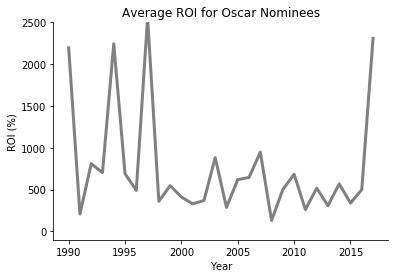

In [59]:
roi_year = nominee_df.groupby('Year')
avg_roi = roi_year['ROI'].mean()
roi_data = pd.DataFrame({'Avg ROI': avg_roi})
roi_data.reset_index(inplace = True)
plt.plot(roi_data['Year'], roi_data['Avg ROI'],color = 'gray', linewidth=3)

plt.ylim(-100, 2500)

plt.title('Average ROI for Oscar Nominees')
plt.xlabel('Year')
plt.ylabel('ROI (%)')

sns.despine()

plt.savefig("ROI.png")
plt.show()

